In [6]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas


     ---------------------------------------- 10.3/10.3 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 8.5 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

     ---------------------------------------- 8.2/8.2 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 8.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.DataFrame({'sore_throat':[1,0,1,1,0,0,0,1,0,1],'fever':[1,0,1,0,1,0,0,0,1,1],'swollen_glands':[1,0,0,1,0,0,1,0,0,0],'congestion':[1,1,1,0,1,1,0,1,1,1],'headache':[1,1,0,0,0,0,0,1,1,1],'diagnosis':['sore_throat','allergy','cold','sore_throat','cold','allergy','sore_throat','allergy','cold','cold']})
data.to_csv('diagnosis.csv',index=0)

In [3]:
da=pd.read_csv('diagnosis.csv')
da

,sore_throat,fever,swollen_glands,congestion,headache,diagnosis
0,1,1,1,1,1,sore_throat
1,0,0,0,1,1,allergy
2,1,1,0,1,0,cold
3,1,0,1,0,0,sore_throat
4,0,1,0,1,0,cold
5,0,0,0,1,0,allergy
6,0,0,1,0,0,sore_throat
7,1,0,0,1,1,allergy
8,0,1,0,1,1,cold
9,1,1,0,1,1,cold


In [4]:
x=da.drop('diagnosis',axis=1)

In [5]:
x

,sore_throat,fever,swollen_glands,congestion,headache
0,1,1,1,1,1
1,0,0,0,1,1
2,1,1,0,1,0
3,1,0,1,0,0
4,0,1,0,1,0
5,0,0,0,1,0
6,0,0,1,0,0
7,1,0,0,1,1
8,0,1,0,1,1
9,1,1,0,1,1


In [6]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder().fit_transform(da['diagnosis'])
x = da.drop(columns=['diagnosis'])
y = da['diagnosis']

In [7]:
y=da['diagnosis']


In [8]:
y

0    sore_throat
1        allergy
2           cold
3    sore_throat
4           cold
5        allergy
6    sore_throat
7        allergy
8           cold
9           cold
Name: diagnosis, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier(criterion = 'entropy')

In [13]:
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [14]:
y_pred=dt.predict(x)

In [15]:
y_pred

array(['sore_throat', 'allergy', 'cold', 'sore_throat', 'cold', 'allergy',
       'sore_throat', 'allergy', 'cold', 'cold'], dtype=object)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print("train data accuraccy=",accuracy_score(y,dt.predict(x)))
print("test data accuracy=",accuracy_score(y,y_pred))

train data accuraccy= 1.0
test data accuracy= 1.0


In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [19]:
from sklearn import tree    

[Text(0.6, 0.8333333333333334, 'congestion <= 0.5\nentropy = 1.571\nsamples = 10\nvalue = [3, 4, 3]\nclass = allergy'),
 Text(0.4, 0.5, 'swollen_glands <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4, 0]\nclass = allergy'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = sore_throat'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = allergy'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = cold')]

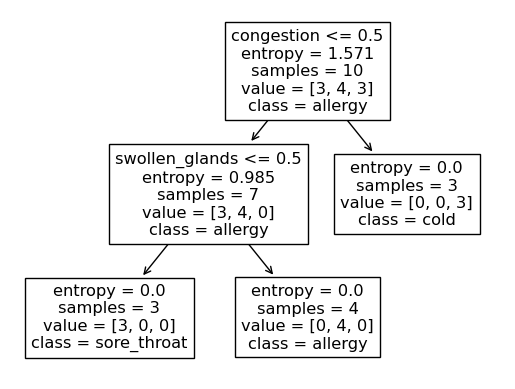

In [20]:
tree.plot_tree(dt, feature_names = da.columns[1:-1], class_names = da['diagnosis'].unique())

In [21]:
sore_throat=0
fever=0
swollen_glands=1
congestion=0
headache=0

In [22]:
frame = pd.DataFrame({'sore_throat':[sore_throat],'fever':[fever],'swollen_glands':[swollen_glands],'congestion':[congestion],'headache':[headache]})

In [23]:
frame

,sore_throat,fever,swollen_glands,congestion,headache
0,0,0,1,0,0


In [24]:
classification=dt.predict(frame)

In [25]:
classification  

array(['sore_throat'], dtype=object)